# 1D Regression Analysis

In this notebook we will learn how to apply a regression on simplified synthetic data. 
Special focus will be on the terms:
Key words:
- Minimize Error Function
- RMS
- Least square fit

- Train vs Test Data
- Extrapolation




### Learning a model, how?

Minimizing an error function, e.g. RMS (root-mean-square) error or in other words: least-square-fit.

# Linear Regression

In [1]:
import numpy as num
import matplotlib.pyplot as plt

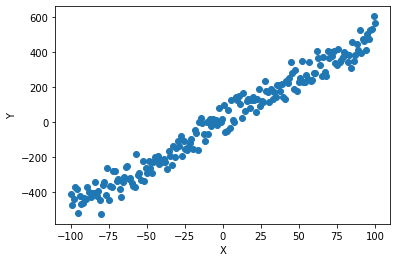

In [14]:
# Creating data
xdata = num.linspace(-100, 100, 200)

# Setting random seed to create same noise
num.random.seed(0)

# Adding noise to data 
noise = num.random.normal(0, 50, len(xdata))
#print(noise)

# x-y-Function
ydata = 5 * xdata + noise

# Plotting data
plt.figure()
plt.scatter(xdata, ydata)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [15]:
# Importing Linear Regression Model from scikit-learn
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [16]:
# Reshaping xdata to fit into model 
xdata = xdata.reshape((-1, 1))

# Fitting the model to the data (or vice-versa?)
model.fit(xdata, ydata)

# Retrieving the quality score
r_sq = model.score(xdata, ydata)
print('Train-R² :', r_sq)
print('Intercept:', model.intercept_)
print('Slope    :', model.coef_)

Train-R² : 0.969475234526012
Intercept: 3.545524657058062
Slope    : [4.95330109]


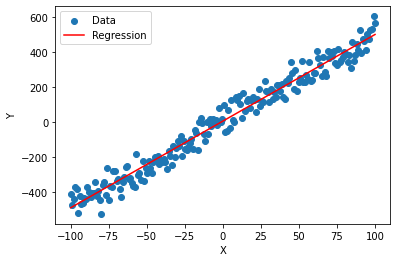

In [17]:
# Creating a regression line and plotting it
yregr = model.coef_ * xdata + model.intercept_
#yregr = model.predict(xtrain)

plt.figure()
plt.scatter(xdata, ydata, label='Data')
plt.plot(xdata, yregr, color='red', label='Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Tasks
Play around with different functions and different data densities.

## Why split the data into train and test datasets?

The split into a dataset only used for training and one dataset only used afterwards to test is really useful to see how good your learned model performance on unseen data and capable of generalizing the problem.

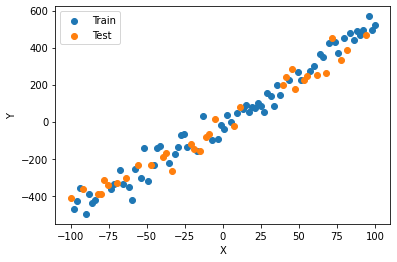

In [18]:
# Creating data
xdata = num.linspace(-100, 100, 100)
num.random.seed(0)
noise = num.random.normal(0, 50, len(xdata))

# x-y-Function
ydata = 5 * xdata + noise

# Split data into train and test set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.33, random_state=42)

# Reshaping
xtrain = xtrain.reshape((-1, 1))
xtest = xtest.reshape((-1, 1))

#ytest += 100

plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Train-Intercept: 4.695761026461305
Train-Slope    : [5.05321953]
Train-R²       : 0.9721383993209128
Test-R²        : 0.9631078435739902


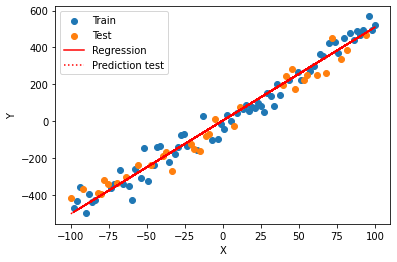

In [19]:
from sklearn.linear_model import LinearRegression

# Fitting
model = LinearRegression()
model.fit(xtrain, ytrain)
print('Train-Intercept:', model.intercept_)
print('Train-Slope    :', model.coef_)

# Predicting train data
yregr = model.predict(xtrain)
train_rsq = model.score(xtrain, ytrain)
print('Train-R²       :', train_rsq)

# Predicting test data
ypred = model.predict(xtest)
test_rsq = model.score(xtest, ytest)
print('Test-R²        :', test_rsq)

plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xtest, ypred, color='red', linestyle=':', label='Prediction test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Extrapolation
- data points outside of training data

Train-Intercept: -5.632846303649586
Train-Slope    : [4.19185391]
Train-R²       : 0.9022069337627145
Test-R²        : 0.7086121241442066


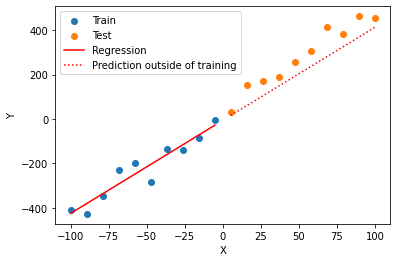

In [20]:
# Creating data
xdata = num.linspace(-100, 100, 20)
num.random.seed(0)
noise = num.random.normal(0, 50, len(xdata))
ydata = 5 * xdata + noise

## Splitting by indices
index = int(len(xdata)/2)
xtrain = xdata[:index]
ytrain = ydata[:index]

xtest = xdata[index:]
ytest = ydata[index:]

xtrain = xtrain.reshape((-1, 1))
xtest = xtest.reshape((-1, 1))


# Fitting and plotting
model = LinearRegression()
model.fit(xtrain, ytrain)

yregr = model.predict(xtrain)
ypred = model.predict(xtest)
train_rsq = model.score(xtrain, ytrain)
test_rsq = model.score(xtest, ytest)
print('Train-Intercept:', model.intercept_)
print('Train-Slope    :', model.coef_)
print('Train-R²       :', train_rsq)
print('Test-R²        :', test_rsq)

plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xtest, ypred, color='red', linestyle=':', label='Prediction outside of training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

PREDICTION OUTSIDE OF REGRESSION LEARNING DATA should be avoided

# Multi linear regression

Train-Intercept: -397.8994497537949
Train-Slope    : [49.4499152]
Train-R²       : 0.9190163233656129
Test-R²        : -0.8115857074983615


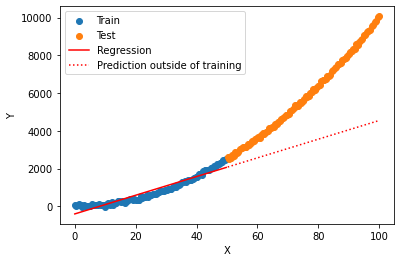

In [21]:
# Creating data
xdata = num.linspace(0, 100, 200)
num.random.seed(0)
noise = num.random.normal(0, 50, len(xdata))
ydata = xdata**2 + noise

## Splitting randomly
# xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.33, random_state=42)

## Splitting by indices
index = int(len(xdata)/2)
xtrain = xdata[:index]
ytrain = ydata[:index]

xtest = xdata[index:]
ytest = ydata[index:]

# Reshaping
xtrain = xtrain.reshape((-1, 1))
xtest = xtest.reshape((-1, 1))


# Fitting and plotting
model = LinearRegression()
model.fit(xtrain, ytrain)

yregr = model.predict(xtrain)
ypred = model.predict(xtest)
train_rsq = model.score(xtrain, ytrain)
test_rsq = model.score(xtest, ytest)
print('Train-Intercept:', model.intercept_)
print('Train-Slope    :', model.coef_)
print('Train-R²       :', train_rsq)
print('Test-R²        :', test_rsq)

plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xtest, ypred, color='red', linestyle=':', label='Prediction outside of training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Additional parameters are needed: e.g. Polynomial regression

Train-R²       : 0.9961900765333604
Test-R²        : 0.9813107385693104


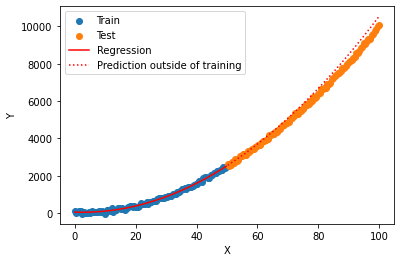

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

model.fit(xtrain, ytrain)

yregr = model.predict(xtrain)
ypred = model.predict(xtest)
train_rsq = model.score(xtrain, ytrain)
test_rsq = model.score(xtest, ytest)
print('Train-R²       :', train_rsq)
print('Test-R²        :', test_rsq)

plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xtest, ypred, color='red', linestyle=':', label='Prediction outside of training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# With numpy polynomial

Slight changes in syntax, e.g. no reshaping needed.

Coeffs: [ 1.10464907 -5.50498832 53.15419727]
[213301.19980006]


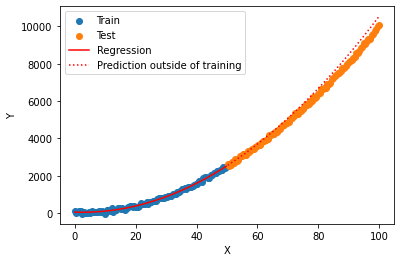

In [23]:
# Creating data
xdata = num.linspace(0, 100, 200)
num.random.seed(0)
noise = num.random.normal(0, 50, len(xdata))
ydata = xdata**2 + noise
#ydata = xdata * 1 + noise
#ydata = num.sin(xdata * 2 * num.pi * 0.01) + xdata * 0.01


## Splitting randomly
# xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.33, random_state=42, shuffle=True)

## Splitting by indices
index = int(len(xdata)/2)
xtrain = xdata[:index]
ytrain = ydata[:index]

xtest = xdata[index:]
ytest = ydata[index:]


# Fitting and plotting
order = 2
coeff, residuals, rank, singular_values, rcond = num.polyfit(xtrain, ytrain, order, full=True)
print('Coeffs:', coeff)
print(residuals)

model = num.poly1d(coeff)
yregr = model(xtrain)
ypred = model(xtest)


plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xtest, ypred, color='red', linestyle=':', label='Prediction outside of training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## Tasks
- different number in datasets
- different orders
- different functions
- overfitting
- underfitting
- prediction outside of learning space
